In [1]:
import openpyxl
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
df = pd.read_excel("data.xlsx", sheet_name=None, header=0)
all_df = {}
for i, d in enumerate(df.items()):
    name, data = d
    all_df[name] = data

In [3]:
data = all_df['1K-01']
data = data[data['DEPTH'] == data["DEPTH"]]   # drop NaN value row
data = data.drop(["Core_Facies"], axis=1)
comb = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]
def label_facies(row):
    f = row['Fluid']
    lf = row['Log_Facies']
    return comb.index((f, lf))
data['MixLabel'] = data.apply(label_facies, axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler

## by categories 

In [5]:
X = data[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]
ss = StandardScaler()
X = ss.fit_transform(X)
Y = data['MixLabel']

In [6]:
Y.value_counts()

3    426
4    278
1    153
0    104
2     64
Name: MixLabel, dtype: int64

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=5)
Y_pred = model.fit_predict(X)

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
for i in set(Y):
#     print(i, pd.Series(Y_pred[Y==i]).apply(lambda x: str(x)).describe())
#     print(i, pd.Series(Y_pred[Y==i]).apply(lambda x: str(x)).value_counts())
#     print("#######")
    print("cluster", i)
    print(pd.Series(Y[Y_pred==i]).apply(lambda x: str(x)).value_counts())
#     print("####################")

cluster 0
4    206
3    124
Name: MixLabel, dtype: int64
cluster 1
1    83
2    63
0    13
4    10
3     7
Name: MixLabel, dtype: int64
cluster 2
3    271
4     60
Name: MixLabel, dtype: int64
cluster 3
3    1
0    1
Name: MixLabel, dtype: int64
cluster 4
0    90
1    70
3    23
4     2
2     1
Name: MixLabel, dtype: int64


In [11]:
data_test = all_df['1X-02']
data_test = data_test[data_test['DEPTH'] == data_test["DEPTH"]]  
data_test = data_test.drop(["Core_Facies"], axis=1)

data_test['MixLabel'] = data_test.apply(label_facies, axis=1)
X_test = data_test[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]
X_test = ss.fit_transform(X_test)
Y_test = data_test['MixLabel']
Y_test_pred = model.predict(X_test)

In [14]:
for i in set(Y_test_pred):
#     print(i, pd.Series(Y_pred[Y==i]).apply(lambda x: str(x)).describe())
#     print(i, pd.Series(Y_pred[Y==i]).apply(lambda x: str(x)).value_counts())
#     print("#######")
    print("cluster", i)
    print(pd.Series(Y_test[Y_test_pred==i]).apply(lambda x: str(x)).value_counts())
#     print("####################")

cluster 0
3    188
4    129
2     11
Name: MixLabel, dtype: int64
cluster 1
1    99
0    37
2    34
4    27
3    16
Name: MixLabel, dtype: int64
cluster 2
3    461
4     26
Name: MixLabel, dtype: int64
cluster 4
1    44
0    21
3     1
Name: MixLabel, dtype: int64


## by categories 2

In [17]:
model = KMeans(n_clusters=2)
Y = data['Fluid']
Y_pred = model.fit_predict(X)
for i in set(Y_pred):
    print("cluster", i)
    print(pd.Series(Y[Y_pred==i]).apply(lambda x: str(x)).value_counts())

cluster 0
1    319
2    162
Name: Fluid, dtype: int64
cluster 1
2    542
1      2
Name: Fluid, dtype: int64


In [18]:
Y_test = data_test['Fluid']
Y_test_pred = model.predict(X_test)
for i in set(Y_test_pred):
    print("cluster", i)
    print(pd.Series(Y_test[Y_test_pred==i]).apply(lambda x: str(x)).value_counts())

cluster 0
2    293
1    233
Name: Fluid, dtype: int64
cluster 1
2    555
1     13
Name: Fluid, dtype: int64


## by categories 3

In [21]:
model = KMeans(n_clusters=3)
Y = data['Log_Facies'].apply(lambda x: int(x))
Y_pred = model.fit_predict(X)
for i in set(Y_pred):
    print("cluster", i)
    print(pd.Series(Y[Y_pred==i]).apply(lambda x: str(x)).value_counts())

cluster 0
1    283
2     61
Name: Log_Facies, dtype: int64
cluster 1
2    209
1    133
3      2
Name: Log_Facies, dtype: int64
cluster 2
2    161
1    114
3     62
Name: Log_Facies, dtype: int64


In [22]:
Y_test = data_test['Log_Facies'].apply(lambda x: int(x))
Y_test_pred = model.predict(X_test)
for i in set(Y_test_pred):
    print("cluster", i)
    print(pd.Series(Y_test[Y_test_pred==i]).apply(lambda x: str(x)).value_counts())

cluster 0
1    455
2     26
Name: Log_Facies, dtype: int64
cluster 1
1    201
2    129
3     13
Name: Log_Facies, dtype: int64
cluster 2
2    170
1     68
3     32
Name: Log_Facies, dtype: int64


## Clustering number selection (by the best K number)

In [25]:
d = []
r = [i for i in range(2, 15)]
for i in r:
    model = KMeans(n_clusters=i)
    model.fit(X)
    d.append(model.inertia_)

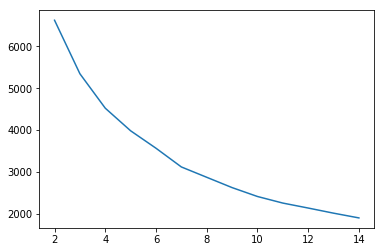

In [26]:
plt.plot(r, d)

In [33]:
from pprint import pprint
for i, n in enumerate(r):
    print(n, d[i])

2 6624.415402606756
3 5345.954206292212
4 4523.2132571509665
5 3983.040207408082
6 3566.463325682108
7 3119.2712897062906
8 2872.3932596251307
9 2625.945532337778
10 2413.5561677822434
11 2256.349729762304
12 2137.6459033910005
13 2015.155969632526
14 1901.6742018892405


In [54]:
model = KMeans(n_clusters=7)
Y = data['MixLabel'].apply(lambda x: int(x))
Y_pred = model.fit_predict(X)
for i in set(Y_pred):
    print("cluster", i)
    print(pd.Series(Y[Y_pred==i]).apply(lambda x: str(x)).value_counts())

cluster 0
4    114
3     28
Name: MixLabel, dtype: int64
cluster 1
1    90
2    63
4    11
0    11
3     8
Name: MixLabel, dtype: int64
cluster 2
0    88
1    63
3    17
4     2
2     1
Name: MixLabel, dtype: int64
cluster 3
3    129
4    116
Name: MixLabel, dtype: int64
cluster 4
3    1
0    1
Name: MixLabel, dtype: int64
cluster 5
3    243
4     35
Name: MixLabel, dtype: int64
cluster 6
0    4
Name: MixLabel, dtype: int64


In [55]:
Y_test = data_test['MixLabel'].apply(lambda x: int(x))
Y_test_pred = model.predict(X_test)
for i in set(Y_test_pred):
    print("cluster", i)
    print(pd.Series(Y_test[Y_test_pred==i]).apply(lambda x: str(x)).value_counts())

cluster 0
4    37
3    23
2    13
Name: MixLabel, dtype: int64
cluster 1
1    103
2     32
4     31
3     26
0     25
Name: MixLabel, dtype: int64
cluster 2
1    37
0    22
Name: MixLabel, dtype: int64
cluster 3
3    202
4     95
Name: MixLabel, dtype: int64
cluster 5
3    415
4     19
Name: MixLabel, dtype: int64
cluster 6
0    11
1     3
Name: MixLabel, dtype: int64


In [56]:
# model = KMeans(n_clusters=7)
Y = data['Fluid'].apply(lambda x: int(x))
Y_pred = model.predict(X)
for i in set(Y_pred):
    print("cluster", i)
    print(pd.Series(Y[Y_pred==i]).apply(lambda x: str(x)).value_counts())

cluster 0
2    142
Name: Fluid, dtype: int64
cluster 1
1    164
2     19
Name: Fluid, dtype: int64
cluster 2
1    152
2     19
Name: Fluid, dtype: int64
cluster 3
2    245
Name: Fluid, dtype: int64
cluster 4
2    1
1    1
Name: Fluid, dtype: int64
cluster 5
2    278
Name: Fluid, dtype: int64
cluster 6
1    4
Name: Fluid, dtype: int64


In [57]:
Y_test = data_test['Fluid'].apply(lambda x: int(x))
Y_test_pred = model.predict(X_test)
for i in set(Y_test_pred):
    print("cluster", i)
    print(pd.Series(Y_test[Y_test_pred==i]).apply(lambda x: str(x)).value_counts())

cluster 0
2    60
1    13
Name: Fluid, dtype: int64
cluster 1
1    160
2     57
Name: Fluid, dtype: int64
cluster 2
1    59
Name: Fluid, dtype: int64
cluster 3
2    297
Name: Fluid, dtype: int64
cluster 5
2    434
Name: Fluid, dtype: int64
cluster 6
1    14
Name: Fluid, dtype: int64


In [58]:
# model = KMeans(n_clusters=7)
Y = data['Log_Facies'].apply(lambda x: int(x))
Y_pred = model.predict(X)
for i in set(Y_pred):
    print("cluster", i)
    print(pd.Series(Y[Y_pred==i]).apply(lambda x: str(x)).value_counts())

cluster 0
2    114
1     28
Name: Log_Facies, dtype: int64
cluster 1
2    101
3     63
1     19
Name: Log_Facies, dtype: int64
cluster 2
1    105
2     65
3      1
Name: Log_Facies, dtype: int64
cluster 3
1    129
2    116
Name: Log_Facies, dtype: int64
cluster 4
1    2
Name: Log_Facies, dtype: int64
cluster 5
1    243
2     35
Name: Log_Facies, dtype: int64
cluster 6
1    4
Name: Log_Facies, dtype: int64


In [59]:
Y_test = data_test['Log_Facies'].apply(lambda x: int(x))
Y_test_pred = model.predict(X_test)
for i in set(Y_test_pred):
    print("cluster", i)
    print(pd.Series(Y_test[Y_test_pred==i]).apply(lambda x: str(x)).value_counts())

cluster 0
2    37
1    23
3    13
Name: Log_Facies, dtype: int64
cluster 1
2    134
1     51
3     32
Name: Log_Facies, dtype: int64
cluster 2
2    37
1    22
Name: Log_Facies, dtype: int64
cluster 3
1    202
2     95
Name: Log_Facies, dtype: int64
cluster 5
1    415
2     19
Name: Log_Facies, dtype: int64
cluster 6
1    11
2     3
Name: Log_Facies, dtype: int64
